In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from pathlib import Path

In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, TimeDistributed,Dropout,GRU,Bidirectional,RepeatVector,LSTM, Conv1D, GlobalMaxPool1D, GlobalAveragePooling1D, AveragePooling1D, MaxPooling1D, SpatialDropout1D
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import pickle
import tensorflow as tf
import os
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,  Attention, Input, Normalization
from tensorflow.keras.layers import concatenate, average, multiply, Reshape, dot
from tensorflow.keras.layers import Multiply, Add, Subtract, Dot, Average, Maximum, Concatenate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import recall_score, precision_score, f1_score

ModuleNotFoundError: No module named 'tensorflow'

# Build training dataset


In [ ]:
from pathlib import Path
path = Path(__file__).parent.parent

In [ ]:
training_rating = pd.read_csv(path + "/training_data.csv")

In [ ]:
training_rating

,UserID,FoodId,rating
0,U112,F24,4.0
1,U130,F26,4.0
2,U120,F5,2.0
3,U170,F12,3.0
4,U92,F30,4.0
...,...,...,...
2266,U240,F27,5.0
2267,U240,F9,1.0
2268,U240,F29,2.0
2269,U240,F15,3.0


In [ ]:
cleaned_user = pd.read_csv(path + "/cleaned_user.csv")
cleaned_user.tail()

,UserID,Age,Weight,Height,like_all,like_mon_nuoc,like_mon_kho,like_mon_nuong,like_mon_cay,is_north,is_south,is_middle,gender_others,gender_male,gender_female
0,U236,22.0,3.0,3.0,0,1,1,1,0,1,0,0,0,1,0
1,U237,23.0,3.0,3.0,0,1,0,1,0,0,0,1,0,1,0
2,U238,21.0,4.0,4.0,1,0,0,0,0,0,1,0,0,1,0
3,U239,21.0,4.0,3.0,0,1,1,1,0,0,1,0,0,1,0
4,U240,21.0,5.0,5.0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
cleaned_user

,UserID,Age,Weight,Height,like_all,like_mon_nuoc,like_mon_kho,like_mon_nuong,like_mon_cay,is_north,is_south,is_middle,gender_others,gender_male,gender_female
0,U1,18.0,0.0,0.0,0,1,0,0,1,0,1,0,0,1,0
1,U2,20.0,0.0,0.0,0,0,1,0,0,0,1,0,0,1,0
2,U3,21.0,0.0,0.0,0,0,0,1,0,0,1,0,0,1,0
3,U4,18.0,0.0,0.0,0,1,1,1,0,1,0,0,0,1,0
4,U5,35.0,5.0,4.0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,U236,22.0,3.0,3.0,0,1,1,1,0,1,0,0,0,1,0
1,U237,23.0,3.0,3.0,0,1,0,1,0,0,0,1,0,1,0
2,U238,21.0,4.0,4.0,1,0,0,0,0,0,1,0,0,1,0
3,U239,21.0,4.0,3.0,0,1,1,1,0,0,1,0,0,1,0


In [ ]:
food_description = pd.read_csv(path+"/food_description.csv")
food_feature = pd.read_csv(path+"/food_features.csv")

In [ ]:
food_feature

,FoodID,is_north,is_south,is_middle,is_mon_kho,is_mon_nuoc,is_mon_nuong
0,F1,1,1,1,1,0,0
1,F2,0,0,1,0,1,0
2,F3,1,0,0,0,1,0
3,F4,0,1,0,1,0,0
4,F5,0,1,0,0,1,0
5,F6,1,0,0,0,1,0
6,F7,1,0,0,1,0,0
7,F8,0,0,1,0,1,0
8,F9,1,1,1,0,1,0
9,F10,1,1,1,1,0,0


In [ ]:
xtrain_user_information = pd.merge(training_rating, cleaned_user, how='left', left_on='UserID', right_on='UserID')

In [ ]:
xtrain_user_information.drop(['FoodId', 'rating', 'UserID'], axis = 1, inplace = True)

In [ ]:
xtrain_user_information

,Age,Weight,Height,like_all,like_mon_nuoc,like_mon_kho,like_mon_nuong,like_mon_cay,is_north,is_south,is_middle,gender_others,gender_male,gender_female
0,18.0,2.0,2.0,0,0,1,1,0,0,1,0,0,0,1
1,18.0,5.0,4.0,0,0,1,1,0,0,0,1,0,1,0
2,19.0,3.0,4.0,1,0,0,0,0,0,0,1,0,1,0
3,17.0,5.0,3.0,0,0,1,1,0,1,0,0,0,1,0
4,18.0,2.0,2.0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,21.0,5.0,5.0,0,1,0,0,0,1,0,0,0,1,0
2267,21.0,5.0,5.0,0,1,0,0,0,1,0,0,0,1,0
2268,21.0,5.0,5.0,0,1,0,0,0,1,0,0,0,1,0
2269,21.0,5.0,5.0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
xtrain_food_feature = pd.merge(training_rating, food_feature, how='left', left_on='FoodId', right_on='FoodID')

In [ ]:
xtrain_food_feature.drop(['FoodId', 'FoodID', 'rating', 'UserID'], axis = 1, inplace = True)

In [ ]:
xtrain_food_feature

,is_north,is_south,is_middle,is_mon_kho,is_mon_nuoc,is_mon_nuong
0,1,1,1,0,1,0
1,1,1,1,0,1,0
2,0,1,0,0,1,0
3,0,1,1,1,0,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
2266,1,0,1,0,0,1
2267,1,1,1,0,1,0
2268,1,1,1,1,0,0
2269,1,1,1,0,0,1


In [ ]:
xtrain_food_feature_columns_name = ['is_north1', 'is_south1', 'is_middle1', 'is_mon_kho1', 'is_mon_nuoc1',
       'is_mon_nuong1']

xtrain_food_feature.columns = xtrain_food_feature_columns_name

In [ ]:
xtrain_food_description = pd.merge(training_rating, food_description, how='left', left_on='FoodId', right_on='FoodID')

In [ ]:
xtrain_food_description.drop(['FoodId', 'FoodID', 'rating', 'UserID'], axis = 1, inplace = True)

In [ ]:
xtrain_food_description

,processed_description
0,thịt bò bột năng củ bánh mì rau kèm bò kho món...
1,thịt cua bột năng trứng gà rau củ xúp cua món ...
2,miến dong thịt gà nấm rau thơm miến gà vị thịt...
3,bột gạo ruốc tôm bánh bèo món bánh thịnh hành ...
4,bao tử heo tai heo ruột non dừa phá lấu món qu...
...,...
2266,thịt gà gạo nếp mật ong vị mật ong thấm miếng ...
2267,bún riêu cua thịt heo đậu cà chua huyết heo ch...
2268,bột năng bột gạo thịt heo cà rốt nấm há cảo mó...
2269,thịt nạc dăm bún tươi hành lá đậu phộng cà rốt...


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(xtrain_food_description.processed_description)
tf_idf_matrix_train = vectorizer.transform(xtrain_food_description.processed_description).toarray()



In [ ]:
ytrain = training_rating.loc[:, 'rating']


# Build test dataset

In [ ]:
testing_rating = pd.read_csv(path+"/testing_data.csv")

In [ ]:
testing_rating

,UserID,FoodId,rating
0,U199,F16,3.0
1,U173,F26,4.0
2,U130,F19,3.0
3,U202,F9,5.0
4,U99,F2,3.0
...,...,...,...
112,U57,F9,4.0
113,U224,F4,4.0
114,U206,F9,3.0
115,U83,F5,3.0


In [ ]:
xtest_user_information = pd.merge(testing_rating, cleaned_user, how='left', left_on='UserID', right_on='UserID')

In [ ]:
xtest_user_information.drop(['FoodId', 'rating', 'UserID'], axis = 1, inplace = True)

In [ ]:
xtest_user_information

,Age,Weight,Height,like_all,like_mon_nuoc,like_mon_kho,like_mon_nuong,like_mon_cay,is_north,is_south,is_middle,gender_others,gender_male,gender_female
0,18.0,5.0,3.0,0,1,0,1,1,0,1,0,0,0,1
1,18.0,3.0,3.0,1,0,0,0,0,0,1,0,0,1,0
2,18.0,5.0,4.0,0,0,1,1,0,0,0,1,0,1,0
3,18.0,3.0,3.0,1,0,0,0,0,0,0,1,0,1,0
4,18.0,3.0,5.0,0,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,18.0,2.0,4.0,1,0,0,0,0,0,1,0,0,1,0
113,18.0,3.0,3.0,1,0,0,0,0,0,0,1,0,0,1
114,18.0,5.0,4.0,1,0,0,0,0,0,1,0,0,1,0
115,19.0,2.0,3.0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
xtest_food_feature = pd.merge(testing_rating, food_feature, how='left', left_on='FoodId', right_on='FoodID')

In [ ]:
xtest_food_feature.drop(['FoodId', 'FoodID', 'rating', 'UserID'], axis = 1, inplace = True)

In [ ]:
xtest_food_feature

,is_north,is_south,is_middle,is_mon_kho,is_mon_nuoc,is_mon_nuong
0,0,1,0,0,1,0
1,1,1,1,0,1,0
2,1,0,0,1,0,0
3,1,1,1,0,1,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
112,1,1,1,0,1,0
113,0,1,0,1,0,0
114,1,1,1,0,1,0
115,0,1,0,0,1,0


In [ ]:
xtest_food_feature_columns_name = ['is_north1', 'is_south1', 'is_middle1', 'is_mon_kho1', 'is_mon_nuoc1',
       'is_mon_nuong1']

xtest_food_feature.columns = xtest_food_feature_columns_name

In [ ]:
xtest_food_description = pd.merge(testing_rating, food_description, how='left', left_on='FoodId', right_on='FoodID')

In [ ]:
xtest_food_description.drop(['FoodId', 'FoodID', 'rating', 'UserID'], axis = 1, inplace = True)

In [ ]:
xtest_food_description

,processed_description
0,mắm cá linh mắm cá sặc tôm mực thịt lợn xả ớt ...
1,thịt cua bột năng trứng gà rau củ xúp cua món ...
2,bột gạo thịt lợn xay mộc nhĩ hẹ tây bánh bột g...
3,bún riêu cua thịt heo đậu cà chua huyết heo ch...
4,mìnước lèo thịt tôm cá trứng đậu phộng bánh ...
...,...
112,bún riêu cua thịt heo đậu cà chua huyết heo ch...
113,gạo thịt sườn heo mỡ hành trứng chiên rau chua...
114,bún riêu cua thịt heo đậu cà chua huyết heo ch...
115,miến dong thịt gà nấm rau thơm miến gà vị thịt...


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(xtest_food_description.processed_description)
tf_idf_matrix_test = vectorizer.transform(xtest_food_description.processed_description).toarray()



In [ ]:
ytest = testing_rating.loc[:, 'rating']
# ytest1 = pd.get_dummies(ytest).to_numpy()
# ytest1

# Build Catboost model

In [ ]:
!pip install catboost --quiet

     |████████████████████████████████| 76.3 MB 1.4 MB/s 


In [ ]:
columns_name = ['Age', 'Weight', 'Height', 'like_all', 'like_mon_nuoc', 'like_mon_kho',
       'like_mon_nuong', 'like_mon_cay', 'is_north2', 'is_south2', 'is_middle2',
       'gender_others', 'gender_male', 'gender_female', 'is_north1', 'is_south1',
       'is_middle1', 'is_mon_kho1', 'is_mon_nuoc1', 'is_mon_nuong1']

xtrain = pd.concat([xtrain_user_information, xtrain_food_feature, pd.DataFrame(tf_idf_matrix_train)], axis = 1)
xtest = pd.concat([xtest_user_information, xtest_food_feature, pd.DataFrame(tf_idf_matrix_test)], axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from catboost import CatBoostClassifier, CatBoostRegressor

from sklearn.svm import SVC, SVR

model = CatBoostClassifier(iterations=1000, learning_rate=0.001, depth=16)
model.fit(xtrain, ytrain, verbose = 100)


In [ ]:
ytest_pred = model.predict(xtest)
ytrain_pred = model.predict(xtrain)

In [ ]:
xtrain.shape

(2104, 400)

In [ ]:
min = ytest.min()
max = ytest.max()


In [ ]:


print('Train evaluation: ')
print("MSE: ", mean_squared_error(ytrain, ytrain_pred))
print("RMSE: ", np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
print("MAE", mean_absolute_error(ytrain, ytrain_pred))
print("NMAE", mean_absolute_error(ytrain, ytrain_pred)/(max - min))

Train evaluation: 
MSE:  0.9078337857353959
RMSE:  0.9528031201331133
MAE 0.7810809182216396
NMAE 0.1952702295554099


In [ ]:
print('Test evaluation: ')
print("MSE: ", mean_squared_error(ytest, ytest_pred))
print("RMSE: ", np.sqrt(mean_squared_error(ytest, ytest_pred)))
print("MAE", mean_absolute_error(ytest, ytest_pred))
print("NMAE", mean_absolute_error(ytrain, ytrain_pred)/(max - min))

Test evaluation: 
MSE:  1.2072367912388366
RMSE:  1.0987432781313553
MAE 0.9094148284959311
NMAE 0.1952702295554099


In [ ]:
import pickle
with open("/content/drive/MyDrive/Food Recommend Project/Linh Models for redcommend/catboost.pkl", "wb") as model_dst:
  pickle.dump(model, model_dst)

# Build NN model

In [ ]:

xtrain_food_description = pd.DataFrame(tf_idf_matrix_train)
xtest_food_description = pd.DataFrame(tf_idf_matrix_test)


In [ ]:
input_user = Input(shape=xtrain_user_information.shape[1])
input_feature = Input(shape=xtrain_food_feature.shape[1])
input_desciption = Input(shape=xtrain_food_description.shape[1])

fc1_user = Dense(units=64, activation='relu')(input_user)
fc1_feature = Dense(units=64, activation='relu')(input_feature)
fc1_desciption = Dense(units=300, activation='relu')(input_desciption)

combined = concatenate([fc1_user, fc1_feature, fc1_desciption])

fc2 = Dense(units=72, activation='relu')(combined)

# drop1 = Dropout(rate = 0.2)(fc2)

fc3 = Dense(units=32, activation='relu')(fc2)

norm = Normalization()(fc3)

fc4 = Dense(units=8, activation='relu')(norm)

final = Dense(units=1, activation='linear')(fc4)

In [ ]:
model1 = Model(inputs=[input_user, input_feature, input_desciption], outputs=final)

In [ ]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

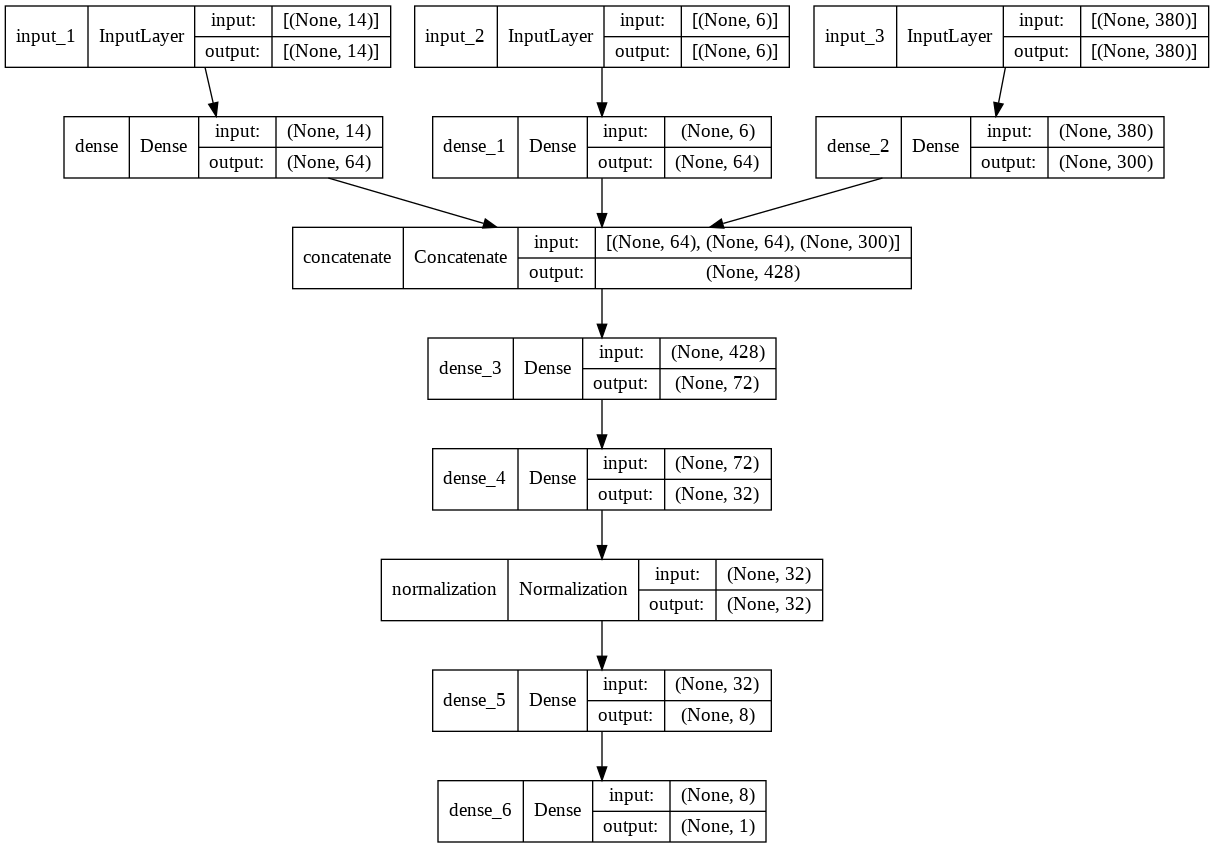

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [ ]:
history = model1.fit([xtrain_user_information, xtrain_food_feature, xtrain_food_description], ytrain, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
34/34 [==============================] - 2s 17ms/step - loss: 2.6309 - mse: 2.6309 - mae: 1.2667 - val_loss: 1.2595 - val_mse: 1.2595 - val_mae: 0.9292
Epoch 2/50
34/34 [==============================] - 0s 6ms/step - loss: 1.1237 - mse: 1.1237 - mae: 0.8604 - val_loss: 1.1845 - val_mse: 1.1845 - val_mae: 0.8787
Epoch 3/50
34/34 [==============================] - 0s 6ms/step - loss: 1.0730 - mse: 1.0730 - mae: 0.8363 - val_loss: 1.1711 - val_mse: 1.1711 - val_mae: 0.8652
Epoch 4/50
34/34 [==============================] - 0s 6ms/step - loss: 1.0613 - mse: 1.0613 - mae: 0.8279 - val_loss: 1.1580 - val_mse: 1.1580 - val_mae: 0.8587
Epoch 5/50
34/34 [==============================] - 0s 6ms/step - loss: 1.0465 - mse: 1.0465 - mae: 0.8195 - val_loss: 1.1295 - val_mse: 1.1295 - val_mae: 0.8609
Epoch 6/50
34/34 [==============================] - 0s 7ms/step - loss: 1.0380 - mse: 1.0380 - mae: 0.8139 - val_loss: 1.1252 - val_mse: 1.1252 - val_mae: 0.8520
Epoch 7/50
34/34 [=========

In [ ]:
model1.evaluate([xtrain_user_information, xtrain_food_feature, xtrain_food_description], ytrain)

66/66 [==============================] - 0s 3ms/step - loss: 0.8952 - mse: 0.8952 - mae: 0.7626


[0.895200252532959, 0.895200252532959, 0.7625860571861267]

In [ ]:
model1.evaluate([xtest_user_information, xtest_food_feature, xtest_food_description], ytest)

8/8 [==============================] - 0s 3ms/step - loss: 1.2016 - mse: 1.2016 - mae: 0.8937


[1.201608657836914, 1.201608657836914, 0.8936754465103149]

In [ ]:
# model1.save('/content/drive/MyDrive/Food Recommend Project/Linh Models for redcommend/neural.h5')

In [ ]:
ytest_pred1 = model1.predict([xtest_user_information, xtest_food_feature, xtest_food_description])
ytrain_pred1 = model1.predict([xtrain_user_information, xtrain_food_feature, xtrain_food_description])

In [ ]:
ytest_pred = []
for i in range(ytest_pred1.shape[0]):
  ytest_pred.append(ytest_pred1[i][0])


ytrain_pred = []
for i in range(ytrain_pred1.shape[0]):
  ytrain_pred.append(ytrain_pred1[i][0])

In [ ]:
min = ytest.min()
max = ytest.max()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Train evaluation: ')
print("MSE: ", mean_squared_error(ytrain, ytrain_pred))
print("RMSE: ", np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
print("MAE", mean_absolute_error(ytrain, ytrain_pred))
print("NMAE", mean_absolute_error(ytrain, ytrain_pred)/(max - min))

Train evaluation: 
MSE:  0.8952002501879404
RMSE:  0.946150226014844
MAE 0.7625860047204412
NMAE 0.1906465011801103


In [ ]:
print('Test evaluation: ')
print("MSE: ", mean_squared_error(ytest, ytest_pred))
print("RMSE: ", np.sqrt(mean_squared_error(ytest, ytest_pred)))
print("MAE", mean_absolute_error(ytest, ytest_pred))
print("NMAE", mean_absolute_error(ytrain, ytrain_pred)/(max - min))

Test evaluation: 
MSE:  1.2016085765526885
RMSE:  1.096179080512253
MAE 0.8936755280209403
NMAE 0.1906465011801103


# Build Neural Collaborative Filtering

In [ ]:
for i in range(training_rating.shape[0]):
  training_rating.loc[i, 'UserID'] = float(training_rating.loc[i, 'UserID'][1:])
  training_rating.loc[i, 'FoodId'] = float(training_rating.loc[i, 'FoodId'][1:])
training_rating
for i in range(testing_rating.shape[0]):
  testing_rating.loc[i, 'UserID'] = float(testing_rating.loc[i, 'UserID'][1:])
  testing_rating.loc[i, 'FoodId'] = float(testing_rating.loc[i, 'FoodId'][1:])
testing_rating

,UserID,FoodId,rating
0,199,16,3.0
1,173,26,4.0
2,130,19,3.0
3,202,9,5.0
4,99,2,3.0
...,...,...,...
112,57,9,4.0
113,224,4,4.0
114,206,9,3.0
115,83,5,3.0


In [ ]:
training_rating.UserID = training_rating.UserID.astype('float64')
training_rating.FoodId = training_rating.FoodId.astype('float64')
testing_rating.UserID = testing_rating.UserID.astype('float64')
testing_rating.FoodId = testing_rating.FoodId.astype('float64')

In [ ]:
min_user_id, max_user_id, min_item_id, max_item_id = 1, 241, 1, 30

In [ ]:
def model_creator():
    import tensorflow as tf
    from tensorflow import keras
    embedding_size=16
    user = keras.layers.Input( shape=())
    item = keras.layers.Input( shape=())
    label = keras.layers.Input( shape=())

    with tf.name_scope("GMF"):
        user_embed_GMF = keras.layers.Embedding(max_user_id + 1, embedding_size)(user)
        item_embed_GMF = keras.layers.Embedding(max_item_id + 1, embedding_size)(item)
        # permuted_item = keras.layers.Permute((2, 1))(item_embed_GMF)
        GMF = keras.layers.Multiply()([user_embed_GMF, item_embed_GMF])
        # GMF = keras.layers.GlobalMaxPool1D()(GMF)

    with tf.name_scope("MLP"):
        user_embed_MLP = keras.layers.Embedding(max_user_id + 1, embedding_size)(user)
        item_embed_MLP = keras.layers.Embedding(max_item_id + 1, embedding_size)(item)
        interaction = tf.concat([user_embed_MLP, item_embed_MLP], axis=-1)
        # pooling = keras.layers.GlobalMaxPool1D()(interaction)
        layer1_MLP = keras.layers.Dense(units=embedding_size * 2, activation='relu')(interaction)
        layer1_MLP = keras.layers.Dropout(rate=0.2)(layer1_MLP)
        layer2_MLP = keras.layers.Dense(units=embedding_size, activation='relu')(layer1_MLP)
        layer2_MLP = keras.layers.Dropout(rate=0.2)(layer2_MLP)
        layer3_MLP = keras.layers.Dense(units=embedding_size // 2, activation='relu')(layer2_MLP)
        layer3_MLP = keras.layers.Dropout(rate=0.2)(layer3_MLP)
        

    # Concate the two parts together
    with tf.name_scope("concatenation"):
        concatenation = tf.concat([GMF, layer3_MLP], axis=-1)
        # pooling1 = keras.layers.GlobalMaxPool1D()(concatenation)
        outputs = keras.layers.Dense(units=1, activation='linear')(concatenation)
    
    model = keras.Model(inputs=[user, item], outputs=outputs)
    model.compile(optimizer= "adam",
                  loss= "mse",
                  metrics=['mse', 'mae'])
    return model

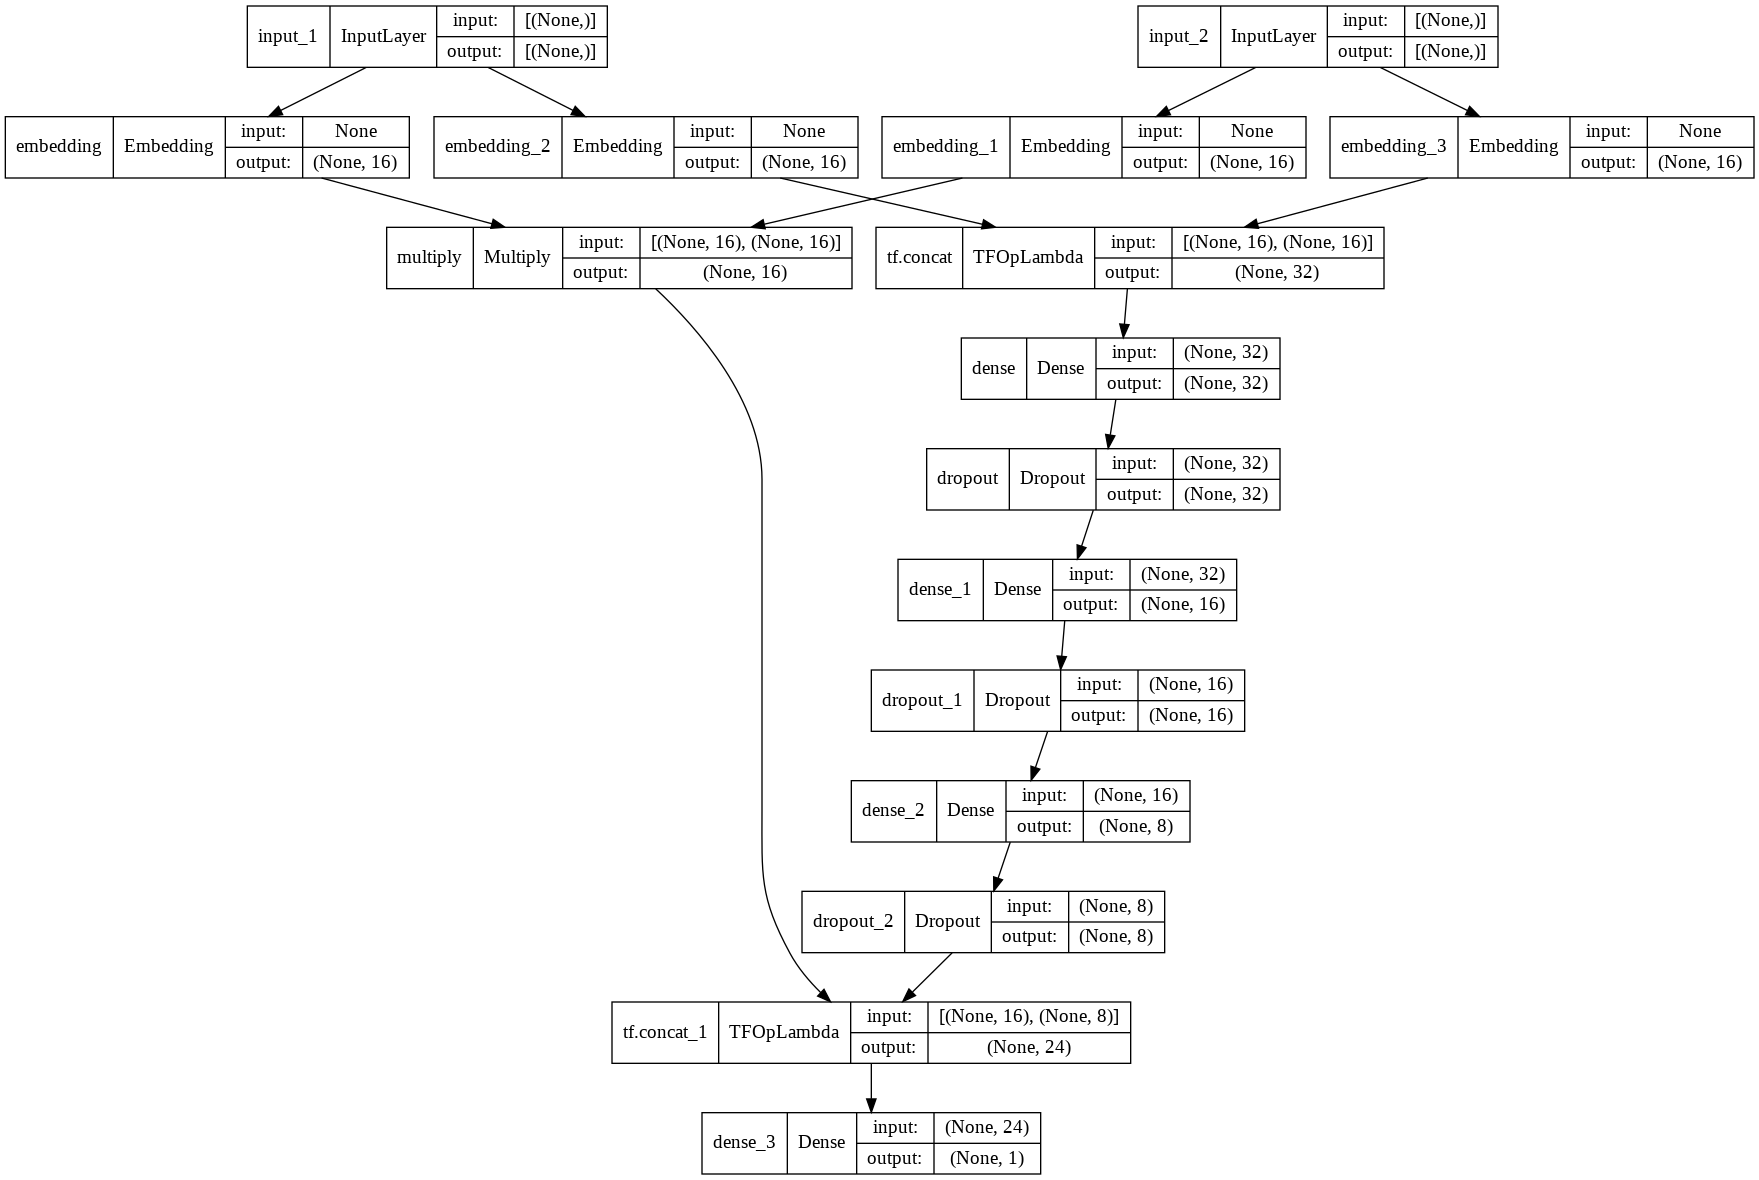

In [ ]:
model = model_creator()

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stop = tf.keras.callbacks.EarlyStopping(patience = 3)
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
hist = model.fit([training_rating.UserID, training_rating.FoodId], ytrain, batch_size=50, epochs=50, validation_split=0.2, callbacks=[early_stop])


Epoch 1/50
37/37 [==============================] - 2s 9ms/step - loss: 14.1583 - mse: 14.1583 - mae: 3.6133 - val_loss: 13.3252 - val_mse: 13.3252 - val_mae: 3.4755
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 11.8606 - mse: 11.8606 - mae: 3.2690 - val_loss: 8.7326 - val_mse: 8.7326 - val_mae: 2.7352
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 4.7035 - mse: 4.7035 - mae: 1.8446 - val_loss: 1.3027 - val_mse: 1.3027 - val_mae: 0.9295
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 2.6714 - mse: 2.6714 - mae: 1.3205 - val_loss: 1.4082 - val_mse: 1.4082 - val_mae: 0.9757
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 2.3247 - mse: 2.3247 - mae: 1.2240 - val_loss: 1.1981 - val_mse: 1.1981 - val_mae: 0.8920
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 2.0497 - mse: 2.0497 - mae: 1.1507 - val_loss: 1.2594 - val_mse: 1.2594 - val_mae: 0.9188
Epoch 7/50
37/37 [====

In [ ]:
model.evaluate([testing_rating.UserID, testing_rating.FoodId], ytest)


4/4 [==============================] - 0s 4ms/step - loss: 0.9138 - mse: 0.9138 - mae: 0.7800


[0.9138460159301758, 0.9138460159301758, 0.7799728512763977]

In [ ]:
model.save('/content/drive/MyDrive/Food Recommend Project/Linh Models for redcommend/neural CF new test.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
ytest_pred1 = model.predict([testing_rating.UserID, testing_rating.FoodId])
ytrain_pred1 = model.predict([training_rating.UserID, training_rating.FoodId])

In [ ]:
ytest_pred = []
for i in range(ytest_pred1.shape[0]):
  ytest_pred.append(ytest_pred1[i][0])


ytrain_pred = []
for i in range(ytrain_pred1.shape[0]):
  ytrain_pred.append(ytrain_pred1[i][0])

In [ ]:
min = ytest.min()
max = ytest.max()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Train evaluation: ')
print("MSE: ", mean_squared_error(ytrain, ytrain_pred))
print("RMSE: ", np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
print("MAE", mean_absolute_error(ytrain, ytrain_pred))
print("NMAE", mean_absolute_error(ytrain, ytrain_pred)/(max - min))

Train evaluation: 
MSE:  0.8518111297117198
RMSE:  0.9229361460641358
MAE 0.7351983458604229
NMAE 0.18379958646510572


In [ ]:
print('Test evaluation: ')
print("MSE: ", mean_squared_error(ytest, ytest_pred))
print("RMSE: ", np.sqrt(mean_squared_error(ytest, ytest_pred)))
print("MAE", mean_absolute_error(ytest, ytest_pred))
print("NMAE", mean_absolute_error(ytrain, ytrain_pred)/(max - min))

Test evaluation: 
MSE:  0.913846082026305
RMSE:  0.9559529706143002
MAE 0.7799728263137687
NMAE 0.18379958646510572
